In [47]:
#importar a biblioteca pandas
import pandas as pd

#fazendo leitura de arquivos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#visualizar o data Frame
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Avisos: 
### A partir daqui a ideia é aplicar alguns fundamentos de Pandas para poder mineirar os dados
### Nem tudo é de suma importancia para o treinamento, algumas células só servirão para visualizar os dados e praticar os fundamentos da biblioteca
### As partes mais importantes estarão marcadas 

In [48]:
#Selecionando a coluna 'Age' do DataFrame
#O resultado disso é uma Series do Pandas
idades = df_train['Age']

#Vamos ver o tipo do objeto para confirmar
print("Tipo do objeto 'idades':", type(idades))

#Agora vamos ver as 5 primeiras idades da nossa Series
print("\nAs 5 primeiras idades:")
print(idades.head())

Tipo do objeto 'idades': <class 'pandas.core.series.Series'>

As 5 primeiras idades:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [49]:
#Selecionando a coluna 'Sex'
sexos = df_train['Sex']

print(sexos.head())

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


## Investigar como as features (características) se relacionam com a variável alvo. Isso nos ajuda a identificar quais colunas são potencialmente mais importantes para a previsão e a formular hipóteses
## Hipótese 1: A classe do passageiro (Pclass) influencia a sobrevivência? 
## Hipótese 2: O sexo (Sex) influencia a sobrevivência? 

In [4]:
# Calcular a média de idade
print("Idade média:", df_train['Age'].mean())

# Contar o número de homens e mulheres
print("\nContagem por sexo:")
print(df_train['Sex'].value_counts())

Idade média: 29.69911764705882

Contagem por sexo:
Sex
male      577
female    314
Name: count, dtype: int64


In [51]:
#Fazemos o mesmo com Pclass(as classes)
#Na contagem vemos que a maioria está na terceira classe

print("classe do passageiro:", df_train['Pclass'].mean())

print("\nContagem:")
print(df_train['Pclass'].value_counts())

classe do passageiro: 2.308641975308642

Contagem:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [52]:
# Agrupar por 'Pclass' e calcular a média da coluna 'Survived' para cada grupo
# A média de uma coluna com 0s e 1s é a mesma coisa que a porcentagem de 1s, a taxa de sobrevivencia
df_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [53]:
#Agora extraindo a Series 'Fare' para facilitar
precos_passagens = df_train['Fare']

#aplicar os métodos de soma, media, desvio padrao, minimo e maximo
print(f"Soma de todo o dinheiro arrecadado com passagens: ${precos_passagens.sum():.2f}")
print(f"Preço médio da passagem: ${precos_passagens.mean():.2f}")
print(f"Desvio padrão dos preços: ${precos_passagens.std():.2f}")
print(f"Passagem mais barata: ${precos_passagens.min():.2f}")
print(f"Passagem mais cara: ${precos_passagens.max():.2f}")

Soma de todo o dinheiro arrecadado com passagens: $28693.95
Preço médio da passagem: $32.20
Desvio padrão dos preços: $49.69
Passagem mais barata: $0.00
Passagem mais cara: $512.33


In [54]:
# Extraindo a coluna dos sobrviventes
sobreviventes = df_train['Survived']

# .sum() vai contar o número de 1s, ou seja, o total de sobreviventes
print(f"Total de sobreviventes no dataset de treino: {sobreviventes.sum()} pessoas")

# .mean() vai calcular a taxa de sobrevivência geral (soma / total)
print(f"Taxa de sobrevivência geral: {sobreviventes.mean():.2%}")

Total de sobreviventes no dataset de treino: 342 pessoas
Taxa de sobrevivência geral: 38.38%


In [55]:
#Analisando a coluna 'PassengerId'
id_passageiros = df_train['PassengerId']

# O atributo .size nos diz quantos elementos existem na Series
print(f"O número total de passageiros no treino é: {id_passageiros.size}")

# O atributo .is_unique verifica se todos os valores são únicos
# Isso é importante para uma coluna de ID, pois nao queremos que haja duplicatas
print(f"A coluna 'PassengerId' tem valores únicos? {id_passageiros.is_unique}")


O número total de passageiros no treino é: 891
A coluna 'PassengerId' tem valores únicos? True


In [57]:
# Vamos usar a Series de Idades
idades = df_train['Age']

# O atributo .index nos mostra o "dicionário" da Series: os rótulos.
print("Atributo .index")
print(idades.index)


#O atributo .values nos dá apenas os valores, sem os rótulos.
#O resultado é um array do NumPy, a biblioteca numérica por trás do Pandas.
print("Atributo .values (primeiros 10 valores)")
print(idades.values[:10]) 

Atributo .index
RangeIndex(start=0, stop=891, step=1)
Atributo .values (primeiros 10 valores)
[22. 38. 26. 35. 35. nan 54.  2. 27. 14.]


In [58]:
# Carregando os dados NOVAMENTE, mas agora passando um argumento para o parâmetro 'index_col'
df_train_com_index = pd.read_csv('train.csv', index_col='PassengerId')

#Agora as features estão em função dos ID
df_train_com_index.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#Usar 'usecols' para carregar APENAS a coluna 'Sex'.
sexo_df = pd.read_csv('train.csv', usecols=['Sex'])

print("--- Dados carregados com usecols ---")
print("Tipo do objeto:", type(sexo_df))
print(sexo_df.head())


#Usar 'squeeze' para converter o DataFrame de 1 coluna em uma Series.
sexo_series = sexo_df.squeeze()

print("\n--- Dados após usar squeeze ---")
print("Tipo do objeto:", type(sexo_series))
print(sexo_series.head())

--- Dados carregados com usecols ---
Tipo do objeto: <class 'pandas.core.frame.DataFrame'>
      Sex
0    male
1  female
2  female
3  female
4    male

--- Dados após usar squeeze ---
Tipo do objeto: <class 'pandas.core.series.Series'>
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [60]:
# Carregar apenas a coluna 'Age' e já a converte para Series.
idades = pd.read_csv('train.csv', usecols=['Age']).squeeze("columns")

# Agora tiramos a media
print(f"A idade média dos passageiros é: {idades.mean():.2f} anos.")

A idade média dos passageiros é: 29.70 anos.


In [61]:
# Ver as últimas 2 linhas para checar a consistência e o índice final
df_train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [63]:
# O método .sort_values() ordena o DataFrame com base em uma coluna.
# 'ascending=False' significa que queremos do maior para o menor.
df_ordenado_por_preco = df_train.sort_values(by='Fare', ascending=False)

print("--- Passageiros que pagaram mais caro ---")
df_ordenado_por_preco.head()

--- Passageiros que pagaram mais caro ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [64]:
print("\n--- Passageiros que pagaram menos ---")
df_ordenado_por_preco.tail()


--- Passageiros que pagaram menos ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [65]:
# Extrair a Series de Portos de Embarque
portos = df_train['Embarked']

# len() é ótimo para uma verificação rápida do número de linhas
print(f"Total de registros na Series 'portos': {len(portos)}")
print(f"(Equivalente Pandas: {portos.size})") 

# type() é essencial para saber com que tipo de objeto você está lidando
print(f"\nO tipo do objeto 'portos' é: {type(portos)}")

# list() e dict() são usados para CONVERTER o objeto Pandas para um tipo Python nativo
# Útil se você precisar passar os dados para outra biblioteca que não entende Pandas.
lista_de_portos = list(portos.head())
print(f"\nAs 5 primeiras entradas como uma lista: {lista_de_portos}")

dicionario_de_portos = dict(portos.head())
print(f"As 5 primeiras entradas como um dicionário: {dicionario_de_portos}")

Total de registros na Series 'portos': 891
(Equivalente Pandas: 891)

O tipo do objeto 'portos' é: <class 'pandas.core.series.Series'>

As 5 primeiras entradas como uma lista: ['S', 'C', 'S', 'S', 'S']
As 5 primeiras entradas como um dicionário: {0: 'S', 1: 'C', 2: 'S', 3: 'S', 4: 'S'}


In [66]:
# O método .isin() verifica a presença nos VALORES da série.
# Ele espera uma lista de valores para procurar.
passageiros_de_luxo = df_train['Embarked'].isin(['C', 'Q']) # Procurando por Cherbourg ou Queenstown

# O resultado é uma Series de True/False
print("--- Resultado do .isin(['C', 'Q']) ---")
print(passageiros_de_luxo.head())

# Podemos usar essa Series booleana para filtrar nosso DataFrame!
print("\n--- Passageiros que embarcaram em Cherbourg ou Queenstown ---")
df_train[passageiros_de_luxo].head()

--- Resultado do .isin(['C', 'Q']) ---
0    False
1     True
2    False
3    False
4    False
Name: Embarked, dtype: bool

--- Passageiros que embarcaram em Cherbourg ou Queenstown ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [67]:
idades = df_train['Age']

# Ordenando em ordem crescente (do menor para o maior)
# O padrão é ascending=True, então não precisamos escrevê-lo
print("--- 5 idades mais jovens ---")
print(idades.sort_values().head())

# Uma nota importante: veja onde os valores NaN (faltantes) vão parar
# Por padrão, .sort_values() os coloca no final
print("\n--- 5 últimas entradas da série ordenada (mostrando os NaNs) ---")
print(idades.sort_values().tail())

--- 5 idades mais jovens ---
803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
Name: Age, dtype: float64

--- 5 últimas entradas da série ordenada (mostrando os NaNs) ---
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, dtype: float64


In [68]:
#Usamos o método .sort_values() no DataFrame, não na Series
#Usamos o parâmetro 'by' para dizer QUAL COLUNA usar como critério de ordenação
#Usamos 'ascending=False' para trazer os mais caros para o topo

df_ordenado_por_preco = df_train.sort_values(by='Fare', ascending=False)

#Aqui vemos que os que pagaram mais caro, sobreviveram
print("--- Top 5 passageiros por preço de passagem ---")
df_ordenado_por_preco.head()

--- Top 5 passageiros por preço de passagem ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [69]:
# Pegando os passageiros da posição 0, 99 e ultima
primeiro_passageiro = df_train.iloc[0]
print("--- Primeiro Passageiro (Posição 0) ---")
print(primeiro_passageiro)

centesimo_passageiro = df_train.iloc[99]
print("\n--- Centésimo Passageiro (Posição 99) ---")
print(centesimo_passageiro)

ultimo_passageiro = df_train.iloc[-1]
print("\n--- Último Passageiro (Posição -1) ---")
print(ultimo_passageiro)

--- Primeiro Passageiro (Posição 0) ---
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

--- Centésimo Passageiro (Posição 99) ---
PassengerId                  100
Survived                       0
Pclass                         2
Name           Kantor, Mr. Sinai
Sex                         male
Age                         34.0
SibSp                          1
Parch                          0
Ticket                    244367
Fare                        26.0
Cabin                        NaN
Embarked                       S
Name: 99, dtype: object

--- Ú

In [70]:
# Pegar as linhas das posições 10 a 14 (o 15 não é incluído)
fatia_de_passageiros = df_train.iloc[10:15]

print("--- Passageiros das posições 10 a 14 ---")
fatia_de_passageiros

--- Passageiros das posições 10 a 14 ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [71]:
#Ordenar por idade, do maior para o menor, lidando com os NaNs.
df_ordenado_idade = df_train.sort_values(by='Age', ascending=False)

# Usar .iloc[0] para pegar a primeira linha (o passageiro mais velho)
passageiro_mais_velho = df_ordenado_idade.iloc[0]

print("--- Dados do Passageiro Mais Velho ---")
print(passageiro_mais_velho)

--- Dados do Passageiro Mais Velho ---
PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object


In [72]:
# Pegar as 5 primeiras linhas (0 a 4) e as colunas nas posições 2, 3 e 4
# ('Pclass', 'Name', 'Sex')
subset = df_train.iloc[0:5, [2, 3, 4]]

print("\n--- Subconjunto de Linhas e Colunas por Posição ---")
subset


--- Subconjunto de Linhas e Colunas por Posição ---


,Pclass,Name,Sex
0,3,"Braund, Mr. Owen Harris",male
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,3,"Allen, Mr. William Henry",male


In [73]:
# Ver o valor original da idade do passageiro de índice 0
print("Idade original:", df_train.loc[0, 'Age'])

# Usando .loc para corrigir. A linha tem o rótulo 0, a coluna tem o rótulo 'Age'.
df_train.loc[0, 'Age'] = 23.0

# Verificar a mudança
print("Idade corrigida:", df_train.loc[0, 'Age'])


# Fazendo a mesma coisa com .iloc
# Para voltar para o valor original.
df_train.iloc[0, 5] = 22.0

# Verificar a mudança
print("Idade retornou ao original:", df_train.iloc[0, 5])

Idade original: 22.0
Idade corrigida: 23.0
Idade retornou ao original: 22.0


In [74]:
#  quantos valores nulos temos na coluna 'Age'
print("Valores nulos em 'Age' ANTES do tratamento:")
print(df_train['Age'].isnull().sum()) # .isnull() retorna True/False, .sum() conta os Trues

#Calcular a idade média (ignorando os nulos existentes)
media_idade = df_train['Age'].mean()
print(f"\nA idade média a ser usada é: {media_idade:.2f}")

#Usar .loc para selecionar as linhas ONDE a idade é nula
# e, NESSAS LINHAS, na coluna 'Age', atribuir o valor da média.
df_train.loc[df_train['Age'].isnull(), 'Age'] = media_idade

# Verificar se funcionou
print("\nValores nulos em 'Age' DEPOIS do tratamento:")
print(df_train['Age'].isnull().sum())

# usar .info() para ver o total de não-nulos
print("\nVerificando com df.info():")
df_train.info()

Valores nulos em 'Age' ANTES do tratamento:
177

A idade média a ser usada é: 29.70

Valores nulos em 'Age' DEPOIS do tratamento:
0

Verificando com df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
# Carregando os dados novamente para termos um DataFrame "limpo" para o exemplo
df_train_original = pd.read_csv('train.csv')

# Criando uma CÓPIA explícita para trabalhar
df_processado = df_train_original.copy()

print("Cópia criada")

Cópia criada


In [76]:
# Vamos modificar a cópia: remover a coluna 'Ticket'
df_processado.drop('Ticket', axis=1, inplace=True)
print("--- Coluna 'Ticket' removida do DataFrame 'df_processado' ---")
print("Colunas em 'df_processado':", df_processado.columns.tolist())


# Agora, vamos verificar o DataFrame original
#A coluna 'Ticket' ainda deve estar lá
print("\n--- Verificando o DataFrame 'df_train_original' ---")
print("Colunas em 'df_train_original':", df_train_original.columns.tolist())

--- Coluna 'Ticket' removida do DataFrame 'df_processado' ---
Colunas em 'df_processado': ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

--- Verificando o DataFrame 'df_train_original' ---
Colunas em 'df_train_original': ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [77]:
# Selecionando passageiros da 1ª classe
primeira_classe = df_train_original[df_train_original['Pclass'] == 1]

# Agora, tentando modificar essa seleção.
try:
    primeira_classe.loc[:, 'Age'] = 99
except Exception as e:
    print(e)
    
primeira_classe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,99.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,99.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,99.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,99.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,99.0,0,0,113788,35.5000,A6,S


In [78]:
# Selecionando e explicitamente criando uma CÓPIA
primeira_classe_copia = df_train_original[df_train_original['Pclass'] == 1].copy()

#Modificar a cópia com segurança
primeira_classe_copia.loc[:, 'Age'] = 99

print("\n--- Modificação na CÓPIA feita com sucesso e sem warnings ---")
primeira_classe_copia.head()


--- Modificação na CÓPIA feita com sucesso e sem warnings ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,99.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,99.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,99.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,99.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,99.0,0,0,113788,35.5000,A6,S


In [79]:
# Vamos checar os mesmos passageiros (índices 1, 3, 6, 11, 23)
# mas olhando diretamente no DataFrame original
print("Verificando as idades no DataFrame ORIGINAL:")
df_train_original.loc[[1, 3, 6, 11, 23]]

Verificando as idades no DataFrame ORIGINAL:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [80]:
# Aplicando .describe() na Series 'Age'
print("--- Resumo Estatístico da Coluna 'Age' ---")
print(df_train['Age'].describe())

# Aplicando .describe() na Series 'Fare'
print("--- Resumo Estatístico da Coluna 'Fare' ---")
print(df_train['Fare'].describe())

--- Resumo Estatístico da Coluna 'Age' ---
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
--- Resumo Estatístico da Coluna 'Fare' ---
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [81]:
# A coluna 'Embarked' tem alguns valores nulos
#Vamos ver o que .count() e .size nos dizem
print(f"Tamanho da coluna 'Embarked' (size): {df_train['Embarked'].size}")
print(f"Valores não-nulos em 'Embarked' (count): {df_train['Embarked'].count()}")

# Qual o porto de embarque mais comum?
print(f"\nPorto de embarque mais comum (mode):")
print(df_train['Embarked'].mode())

Tamanho da coluna 'Embarked' (size): 891
Valores não-nulos em 'Embarked' (count): 889

Porto de embarque mais comum (mode):
0    S
Name: Embarked, dtype: object


##  Criar novas colunas (features) a partir das existentes para fornecer sinais mais fortes para o modelo. Muitas vezes, uma combinação de colunas ou uma transformação é mais informativa do que os dados brutos, nesse caso foi construida 2:
- Family Size para ter uma única feature de tamanho da família.
- AgeGroup transformar a idade (numérica) em texto para capturar padrões não-lineares.

In [82]:
# Usando broadcasting para criar a nova coluna 'FamilySize'
# Somamos duas Series e um valor escalar (o número 1)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

# Vamos ver o resultado para os primeiros passageiros
print("--- Nova coluna 'FamilySize' criada ---")
print(df_train[['Name', 'SibSp', 'Parch', 'FamilySize']].head())

# Agora podemos usar .describe() na nossa nova feature!
print("\n--- Resumo da nossa nova feature 'FamilySize' ---")
print(df_train['FamilySize'].describe())

--- Nova coluna 'FamilySize' criada ---
                                                Name  SibSp  Parch  FamilySize
0                            Braund, Mr. Owen Harris      1      0           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0           2
2                             Heikkinen, Miss. Laina      0      0           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0           2
4                           Allen, Mr. William Henry      0      0           1

--- Resumo da nossa nova feature 'FamilySize' ---
count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64


In [83]:
import numpy as np

# A coluna 'Fare' tem valores 0, e log(0) é indefinido.
# Usamos broadcasting para adicionar 1 a todos os valores antes de aplicar o log.
df_train['Fare_log'] = np.log(df_train['Fare'] + 1)

# Vamos comparar o .describe() da coluna original e da transformada
print("--- Resumo de 'Fare' ORIGINAL ---")
print(df_train['Fare'].describe())

print("\n--- Resumo de 'Fare_log' TRANSFORMADA ---")
print(df_train['Fare_log'].describe())

--- Resumo de 'Fare' ORIGINAL ---
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

--- Resumo de 'Fare_log' TRANSFORMADA ---
count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare_log, dtype: float64


## Em um problema de classificação, é crucial entender a distribuição da nossa variável alvo. Se, por exemplo, 60% não sobreviveram, um modelo que sempre chuta "não sobreviveu" terá 60% de acurácia. Nosso modelo precisa ser melhor que isso

In [84]:
# Contagem absoluta de sobreviventes e não-sobreviventes
print("--- Contagem Absoluta (Target) ---")
print(df_train['Survived'].value_counts())

# Porcentagem de sobreviventes e não-sobreviventes
print("--- Contagem Normalizada (Target) ---")
print(df_train['Survived'].value_counts(normalize=True))

--- Contagem Absoluta (Target) ---
Survived
0    549
1    342
Name: count, dtype: int64
--- Contagem Normalizada (Target) ---
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [85]:
# Contagem e porcentagem de passageiros por sexo
print("--- Análise da Coluna 'Sex' ---")
print(df_train['Sex'].value_counts())
print("\n--- Análise Normalizada ---")
print(df_train['Sex'].value_counts(normalize=True))

--- Análise da Coluna 'Sex' ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Análise Normalizada ---
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


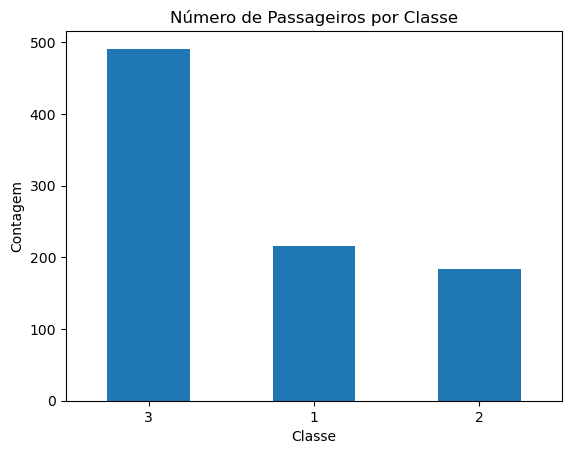

In [86]:
# Importando a biblioteca de visualização
import matplotlib.pyplot as plt

# Criando um gráfico de barras da contagem de passageiros por classe
df_train['Pclass'].value_counts().plot(kind='bar')
plt.title('Número de Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(rotation=0) # Deixa os rótulos do eixo x na horizontal
plt.show()

In [87]:
# A função recebe um valor (a idade) e retorna uma string (a categoria).
def classificar_idade(idade):
    if idade <= 16:
        return 'Criança'
    elif idade <= 60:
        return 'Adulto'
    else:
        return 'Idoso'

# O resultado é uma nova Series, que atribuímos a uma nova coluna.
df_train['AgeGroup'] = df_train['Age'].apply(classificar_idade)

print("--- Nova coluna 'AgeGroup' criada ---")
print(df_train[['Age', 'AgeGroup']].head())

# usar .value_counts() na nossa nova feature
print("\n--- Contagem dos novos grupos de idade ---")
print(df_train['AgeGroup'].value_counts())

--- Nova coluna 'AgeGroup' criada ---
    Age AgeGroup
0  22.0   Adulto
1  38.0   Adulto
2  26.0   Adulto
3  35.0   Adulto
4  35.0   Adulto

--- Contagem dos novos grupos de idade ---
AgeGroup
Adulto     769
Criança    100
Idoso       22
Name: count, dtype: int64


## Deixar o dataset pronto para o modelo. Modelos de Machine Learning não conseguem lidar com dados de texto ou valores nulos.
## Preencher os valores faltantes. Usaremos a média para Age (já que é numérica) e a moda (valor mais comum) para Embarked (categórica).
## Transformar colunas de texto (Sex, Embarked) em números.

In [88]:
#Criar o dicionário de mapeamento (o "de/para").
mapa_sexo = {'male': 0, 'female': 1}

#Usar .map() para aplicar a tradução.
df_train['Sex_encoded'] = df_train['Sex'].map(mapa_sexo)
#Verificar o resultado.
print("--- Coluna 'Sex' transformada em numérica ---")
print(df_train[['Sex', 'Sex_encoded']].head())

--- Coluna 'Sex' transformada em numérica ---
      Sex  Sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0


In [89]:
# Antes de mapear, precisamos tratar os 2 valores nulos que vimos antes.
# A melhor estratégia é preenchê-los com a moda (o valor mais comum, 'S').
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = 'S'
# Agora, criamos o mapa e aplicamos.
mapa_embarked = {'S': 0, 'C': 1, 'Q': 2}
df_train['Embarked_encoded'] = df_train['Embarked'].map(mapa_embarked)

# Verificar o resultado
print("--- Coluna 'Embarked' transformada em numérica ---")
print(df_train[['Embarked', 'Embarked_encoded']].tail()) # .tail() mostra os últimos 5

--- Coluna 'Embarked' transformada em numérica ---
    Embarked  Embarked_encoded
886        S                 0
887        S                 0
888        S                 0
889        C                 1
890        Q                 2


In [90]:
# Lista de colunas que vamos usar como features para o modelo
features = [
    'Pclass',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Sex_encoded',      
    'Embarked_encoded'  
]

# Separando os dados de treino em X e y
X = df_train[features]
y = df_train['Survived']

# Vamos verificar as dimensões para ter certeza que tudo está certo
print("Dimensões de X (features):", X.shape)
print("Dimensões de y (alvo):", y.shape)

# Olhar as 5 primeiras linhas de X para confirmar
X.head()

Dimensões de X (features): (891, 7)
Dimensões de y (alvo): (891,)


,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,3,22.0,1,0,7.2500,0,0
1,1,38.0,1,0,71.2833,1,1
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,0


In [91]:
from sklearn.model_selection import train_test_split

# Dividindo os dados: 80% para treino, 20% para teste/validação
# random_state=42 garante que a divisão seja sempre a mesma, para podermos reproduzir os resultados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando as dimensões dos novos conjuntos de dados
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_val:", X_val.shape)

Dimensões de X_train: (712, 7)
Dimensões de X_val: (179, 7)


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Importar e 2. Criar o modelo
# max_iter=1000 ajuda a garantir que o modelo encontre a melhor solução (convergência)
model = LogisticRegression(max_iter=1000)

# 3. Treinar o modelo com os dados de TREINO
model.fit(X_train, y_train)

# 4. Fazer previsões nos dados de VALIDAÇÃO (que o modelo nunca viu)
predictions = model.predict(X_val)

# 5. Avaliar o desempenho: qual a porcentagem de acerto (acurácia)?
# Tem que ser maior que o aprendizado burro, nesse caso 61.6 que foram os que não sobreviveram
accuracy = accuracy_score(y_val, predictions)

print(f"A acurácia do nosso modelo de Regressão Logística é: {accuracy:.2%}")

A acurácia do nosso modelo de Regressão Logística é: 79.89%


In [93]:
# Lembre-se que df_test foi carregado no início
# Vamos aplicar as mesmas transformações
# NOTA: Existem alguns valores nulos em 'Fare' e 'Age' no df_test, vamos preenchê-los com a média do df_train
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].mean()) # Usar a média do TREINO
df_test['Fare'] = df_test['Fare'].fillna(df_train['Fare'].mean()) # Usar a média do TREINO

# Criar as mesmas colunas encodadas
df_test['Sex_encoded'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked_encoded'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Garantir que o df_test tenha as mesmas colunas na mesma ordem que o X
X_test_final = df_test[features]

# Fazer as previsões finais
final_predictions = model.predict(X_test_final)

# Visualizar as primeiras previsões
print("Previsões para os passageiros do conjunto de teste:")
print(final_predictions[:20])

Previsões para os passageiros do conjunto de teste:
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1]


In [95]:
# Criar um DataFrame para a submissão
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': final_predictions
})

# Salvar o DataFrame em um arquivo .csv
# index=False é importante para não salvar o índice do DataFrame no arquivo
submission.to_csv('submission.csv', index=False)

print("\nArquivo 'submission.csv' criado com sucesso!")


Arquivo 'submission.csv' criado com sucesso!
